<a href="https://colab.research.google.com/github/akadidas/Deep-Learning/blob/master/Emotious_Emotion_Based_Music_Player.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import IPython.display as ipd

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
#------------------------------
#cpu - gpu configuration
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 2} ) #max: 1 gpu, 2 cpu
sess = tf.Session(config=config) 
keras.backend.set_session(sess)
#------------------------------
#variables
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
#------------------------------

In [0]:
with open("/content/gdrive/My Drive/fer2013.csv") as f:
    content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

number of instances:  35888
instance length:  2304


In [0]:
#------------------------------
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

#------------------------------
#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
        print("end")
#------------------------------

In [0]:
#------------------------------
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#------------------------------

28709 train samples
3589 test samples


In [0]:
#construct CNN structure
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
#------------------------------

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
def run_model(fit=True,epochs=10,batch_size=256):
  #batch process
  gen = ImageDataGenerator()
  train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

  #------------------------------

 
  model.compile(loss='categorical_crossentropy'
      , optimizer=keras.optimizers.Adam()
      , metrics=['accuracy']
  )

  #------------------------------
  #------------------------------
  if fit == True:
    #model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
    model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one
  else:
    model.load_weights('facial_expression_model_weights.h5') #load weights
	
  #------------------------------

In [0]:
#function for drawing bar chart for emotion preditions
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    res=objects[np.argmax(emotions)]
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()
    return res

In [0]:
run_model(epochs=6)

Instructions for updating:
Use tf.cast instead.
Epoch 1/6
256/256 [==============================] - 9s 37ms/step - loss: 1.7917 - acc: 0.2571
Epoch 2/6
256/256 [==============================] - 7s 28ms/step - loss: 1.5799 - acc: 0.3729
Epoch 3/6
256/256 [==============================] - 7s 28ms/step - loss: 1.3917 - acc: 0.4628
Epoch 4/6
256/256 [==============================] - 7s 28ms/step - loss: 1.2797 - acc: 0.5103
Epoch 5/6
256/256 [==============================] - 7s 28ms/step - loss: 1.1876 - acc: 0.5488
Epoch 6/6
256/256 [==============================] - 7s 28ms/step - loss: 1.1228 - acc: 0.5763


custom is
<built-in method max of numpy.ndarray object at 0x7faecc239a80>


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


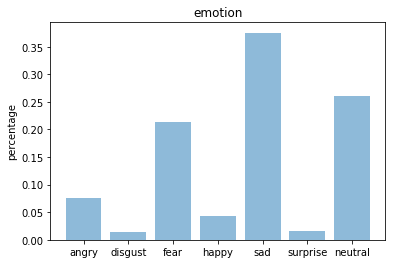

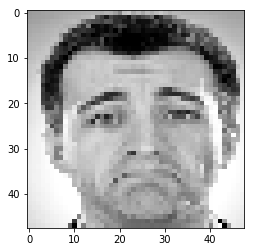

In [0]:
img = image.load_img("/content/gdrive/My Drive/pics/Sad-Face1.png",grayscale=True, target_size=(48, 48))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255
custom = model.predict(x)
print('custom is')
print(custom.max)
res=emotion_analysis(custom[0])
res=res+".mp3"
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
plt.gray()
plt.imshow(x)
plt.show()
ipd.Audio(filename='/content/gdrive/My Drive/Songs/{}'.format(res),autoplay=True)
